# Titanic - Modelo de Machine Learning para previsão da taxa de sobrevivência

Modelo utilizado: Naive Bayes
Inicialmente um dos modelos mais simples e efetivos para modelagem de Machine Learning. Este algoritmo gera uma tabela de probabiliade baseado em uma técnica de classificação de dados, permitindo a analise de diferentes elementos de forma integrada e também separadamente. Resumidamente o modelo se aplica com a seguinte fórmula:
P (A |B) = P (B | A) x P (A) / P (B)

Onde:

P (B | A) significa a probabilidade de B acontecer já que o evento A se confirmou
P (A) é a probabilidade de A acontecer
P (B) é a probabilidade de B acontecer

In [ ]:

#importação das bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix

In [4]:
#lendo o banco de dados
treino = pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')
novo_banco = pd.read_csv('gender_submission.csv')
print('completo')

completo


In [5]:
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Dimensionamento do banco de dados
print(f'Dimensão: [treino:{treino.shape}, teste: {teste.shape}, banco teste: {novo_banco.shape}]')

Dimensão: [treino:(891, 12), teste: (418, 11), banco teste: (418, 2)]


In [7]:
#Informação do banco de dados
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#Informação do banco de dados
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Ao analisar o banco de dados de maneira macro, podemos observar a presença de alguns valores nulos que devemos tratar posteriormente para garantir o funcionamento do nosso modelo.

### Limpeza dos dados

In [9]:
#tratamento dos dados
def limpeza(data):
    #ajustando valores nulos com a média
    cols = ['Age','Fare']
    
    for col in cols:
        data[col].fillna(data[col].mean(), inplace = True)
        
    #substituindo valores com o valor mais frequente
    data.Embarked.fillna(data.Embarked.mode()[0], inplace = True)
    
    return data

In [10]:
from copy import deepcopy
data = deepcopy(treino)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
data = limpeza(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Tratamento das categorias
Precisamos transformar todos os dados para int64 e float64

#### Nomes

In [12]:
#Transformando as categorias
#Essa função transforma as classes do titanic(ex: capitação, marinheiro, passageiro)
def divisor(name):
    tokens = name.split(', ')
    ppl_kind = tokens[1].split('.')[0]
    
    return ppl_kind

#### Cabines

In [13]:

def letra_cabine(cabin):
    if str(cabin) == 'nan':
        return 'NA'
    else:
        return str(cabin)[0]

#### Idade

In [14]:

def idade_range(age):
    if age <= 20:
        return 0
    elif age > 20 and age <= 40:
        return 1
    elif age > 40 and age <= 60:
        return 2
    else:
        return 3

#### Acompanhante

In [15]:
#Acompanhante
def sozinho(id_):
    if id_ in ids.values:
        return 1
    else:
        return 0

#### Baba

In [16]:
#baba
def baba(id_):
    if id in ids.values:
        return 1
    else:
        return 0

#### Bilhetes

In [17]:
#bilhetes
def nulo(ticket):
    if ticket.isnumeric():
        return 1
    else:
        return 0


In [18]:
#transformando
def transformacao(data):
    global ids
    ids = data[data.Parch + data.SibSp == 1]['PassengerId']
    data['sozinho'] = data.PassengerId.apply(sozinho)
    
    ids = data[(data.Age <= 15) & (data.Parch == 0)]['PassengerId']
    data['baba'] = data.PassengerId.apply(baba)
    
    data['Agerange'] = data.Age.apply(idade_range)
    
    data['Ppl_kind'] = data.Name.apply(divisor)
    replace = data['Ppl_kind'].unique()
    data.Ppl_kind.replace(to_replace = replace, value = list(range(len(replace))), inplace=True)
    
    data['TicketType'] = data.Ticket.apply(nulo)
    
    # Mudando as colunas categoricas para numericas
    data.Embarked = data.Embarked.map({'C':0, 'S':1, 'Q':2})
    data['Ppl_kind'] = data['Ppl_kind'].map({0:0, # zero
                                             1:1, 2:1, 3:1, # 1st
                                             4:2, 5:2, # 2nd
                                             6:3, 7:3, 8:3, 9:3, 10:3, 11:3, 12:3, 13:3, 14:3, 15:3, 16:3 # 3rd
                                            })
    data['Agerange'] = data['Agerange'].map({0:0, 1:1, 2:2, 3:2})
    data.Sex = data.Sex.map({'male':0, 'female':1})

    # Excluindo colunas irrelevantes
    data.drop(['PassengerId', 'Name', 'Cabin', 'Ticket', 'SibSp', 'Parch', 'Age'], axis=1, inplace=True)
    
    return data

In [19]:
data = transformacao(data)
data.head()

,Survived,Pclass,Sex,Fare,Embarked,sozinho,baba,Agerange,Ppl_kind,TicketType
0,0,3,0,7.2500,1,1,0,1,0,0
1,1,1,1,71.2833,0,1,0,1,1,0
2,1,3,1,7.9250,1,0,0,1,1,0
3,1,1,1,53.1000,1,1,0,1,1,1
4,0,3,0,8.0500,1,0,0,1,0,1


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Fare        891 non-null    float64
 4   Embarked    891 non-null    int64  
 5   sozinho     891 non-null    int64  
 6   baba        891 non-null    int64  
 7   Agerange    891 non-null    int64  
 8   Ppl_kind    891 non-null    int64  
 9   TicketType  891 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 69.7 KB


In [41]:
#aplicando as funções para o banco de dados teste
bTeste = deepcopy(teste)
bTeste = limpeza(bTeste)
bTeste = transformacao(bTeste)
bTeste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Fare        418 non-null    float64
 3   Embarked    418 non-null    int64  
 4   sozinho     418 non-null    int64  
 5   baba        418 non-null    int64  
 6   Agerange    418 non-null    int64  
 7   Ppl_kind    418 non-null    int64  
 8   TicketType  418 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 29.5 KB


In [42]:
data.head()

,Survived,Pclass,Sex,Fare,Embarked,sozinho,baba,Agerange,Ppl_kind,TicketType
0,0,3,0,7.2500,1,1,0,1,0,0
1,1,1,1,71.2833,0,1,0,1,1,0
2,1,3,1,7.9250,1,0,0,1,1,0
3,1,1,1,53.1000,1,1,0,1,1,1
4,0,3,0,8.0500,1,0,0,1,0,1


### Aplicando o modelo

In [23]:
# Formato de matriz
#pegando os previsores de 0 a 20 para separar previsores de classes
# previsores em um registro, classe em outro
previsores = data.iloc[:,1:9].values
classe = data.iloc[:,0].values

In [24]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)
X_teste

array([[ 3.    ,  0.    , 14.4583, ...,  0.    ,  1.    ,  0.    ],
       [ 3.    ,  0.    ,  7.55  , ...,  0.    ,  1.    ,  0.    ],
       [ 3.    ,  0.    , 29.125 , ...,  0.    ,  0.    ,  1.    ],
       ...,
       [ 3.    ,  0.    , 14.4542, ...,  0.    ,  1.    ,  0.    ],
       [ 3.    ,  1.    ,  7.4958, ...,  0.    ,  0.    ,  1.    ],
       [ 1.    ,  0.    , 27.7208, ...,  0.    ,  1.    ,  0.    ]])

In [25]:
# Criação e treinamento do modelo (geração da tabela de probabilidades)
# X representa as variáveis de treinamento, e Y representa a classe de treinamento do modelo
naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, y_treinamento)

GaussianNB()

In [26]:
# Previsões utilizando os registros de teste
previsoes = naive_bayes.predict(X_teste)
previsoes
# prevendo a classe

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0], dtype=int64)

In [27]:
#geração da matriz de confusão e cálculo da taxa de acerto e erro
# comparando a previsão com oque de fato aconteceu, gerando uma matriz de confusão
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[126,  42],
       [ 23,  77]], dtype=int64)

In [28]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_erro = 1 - taxa_acerto
taxa_acerto

0.7574626865671642

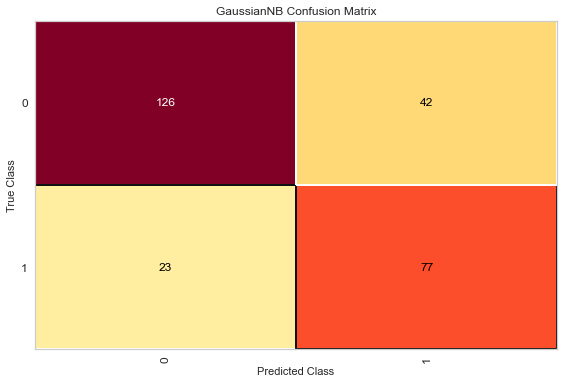

<AxesSubplot:title={'center':'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [29]:
# Visualização da matriz de confusão
v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

In [30]:
bTeste.head()

,Pclass,Sex,Fare,Embarked,sozinho,baba,Agerange,Ppl_kind,TicketType
0,3,0,7.8292,2,0,0,1,0,1
1,3,1,7.0000,1,1,0,2,1,1
2,2,0,9.6875,2,0,0,2,0,1
3,3,0,8.6625,1,0,0,1,0,1
4,3,1,12.2875,1,0,0,1,1,1


In [31]:
previsao = bTeste.iloc[:,0:8].values

In [32]:
naive_bayes.predict(previsao)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,